**Instala con (!pip install) el paquete de pandas – profiling  y GeoPandas**

In [17]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install geopandas

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [18]:
# Paso 2: Importar librerías necesarias para la creación del perfil de datos.

# Importación librerías
import pandas as pd # Librería para el procesamiento de datos
import numpy as np # Librería para análisis vectorial
import matplotlib.pyplot as plt # Librería básica de visualización
import geopandas as gpd #Librería para georrenferenciación
#from pandas_profiling import ProfileReport ==> Versión Antigua
from ydata_profiling import ProfileReport

**Carga del dataset**

In [19]:
# Opción 1: desde URL oficial
# url_csv = "https://www.datos.gov.co/api/views/guhw-8tnz/rows.csv?accessType=DOWNLOAD"
# df = pd.read_csv(url_csv, low_memory=False)

# Opción 2: desde archivo local
df = pd.read_csv("Establecimientos_de_Industria_y_Comercio_activos_por_actividad_comercial.csv", low_memory=False)

print(df.shape)
df.head()


(184082, 9)


,BARRIO,COMUNA,COORD_X,COORD_Y,FECHA_INICIO_ACT,GRUPO_ACTIVIDAD,HOMOLOGACION_CIIU,OBJECTID,point
0,La Candelaria,La Candelaria,834760.29,1183140.37,2015-01-26T00:00:00Z,COMERCIO,1410,1987528,POINT (-75.57047341028175 6.250214349491213)
1,Loreto,Buenos Aires,836677.47,1181104.05,2017-04-20T00:00:00Z,INDUSTRIA,5630,1987527,POINT (-75.55315330386263 6.23180495642713)
2,La Candelaria,La Candelaria,835337.18,1183267.98,2016-01-01T00:00:00Z,INDUSTRIA,6810,1987526,POINT (-75.56526157263693 6.251368033449555)
3,Estación Villa,La Candelaria,835012.19,1183658.97,2017-04-19T00:00:00Z,INDUSTRIA,4775,1987525,POINT (-75.5681976816339 6.254902757005429)
4,Guayaquil,La Candelaria,834782.02,1182704.95,2017-10-05T00:00:00Z,INDUSTRIA,4719,1987524,POINT (-75.57027705311637 6.246277949592498)


In [20]:
reporte = ProfileReport(df, title='Perfil de datos establecimientos')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184082 entries, 0 to 184081
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BARRIO             184062 non-null  object 
 1   COMUNA             184062 non-null  object 
 2   COORD_X            184082 non-null  float64
 3   COORD_Y            184082 non-null  float64
 4   FECHA_INICIO_ACT   184082 non-null  object 
 5   GRUPO_ACTIVIDAD    184082 non-null  object 
 6   HOMOLOGACION_CIIU  141454 non-null  object 
 7   OBJECTID           184082 non-null  int64  
 8   point              184082 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 12.6+ MB


In [22]:
df.columns

Index(['BARRIO', 'COMUNA', 'COORD_X', 'COORD_Y', 'FECHA_INICIO_ACT',
       'GRUPO_ACTIVIDAD', 'HOMOLOGACION_CIIU', 'OBJECTID', 'point'],
      dtype='object')

In [23]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["COORD_X"], df["COORD_Y"]),
    crs="EPSG:4326"   # WGS84
)

In [24]:
gdf["LON"] = gdf.geometry.x
gdf["LAT"] = gdf.geometry.y

df = gdf.drop(columns="geometry").copy()
df["BARRIO"] = df["BARRIO"].astype("string")
df["COMUNA"] = df["COMUNA"].astype("string")
df["GRUPO_ACTIVIDAD"] = df["GRUPO_ACTIVIDAD"].astype("category")
df["HOMOLOGACION_CIIU"] = df["HOMOLOGACION_CIIU"].astype("string")
df["OBJECTID"] = df["OBJECTID"].astype("int64")
df["FECHA_INICIO_ACT"] = pd.to_datetime(df["FECHA_INICIO_ACT"], errors="coerce", utc=True)




In [25]:
reporte = ProfileReport(df, title='Perfil de datos establecimientos')

In [26]:
reporte.to_file(output_file="Perfil.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:10<00:00,  1.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Eliminación de duplicados**

In [27]:
# Número de duplicados antes
duplicados_antes = df.duplicated().sum()
print("Duplicados antes:", duplicados_antes)

# Eliminación
df = df.drop_duplicates().copy()

duplicados_despues = df.duplicated().sum()
print("Duplicados después:", duplicados_despues)


Duplicados antes: 0
Duplicados después: 0


**Tratamiento de valores nulos**

In [28]:
# Resumen de nulos antes
print(df.isna().sum())

# a) HOMOLOGACION_CIIU -> "NO CLASIFICADO"
df["HOMOLOGACION_CIIU"] = df["HOMOLOGACION_CIIU"].fillna("NO CLASIFICADO")

# b) BARRIO y COMUNA -> "DESCONOCIDO"
df["BARRIO"] = df["BARRIO"].fillna("DESCONOCIDO")
df["COMUNA"] = df["COMUNA"].fillna("DESCONOCIDO")

# Verificación
print("\nNulos después de imputar:")
print(df.isna().sum())


BARRIO                  20
COMUNA                  20
COORD_X                  0
COORD_Y                  0
FECHA_INICIO_ACT         0
GRUPO_ACTIVIDAD          0
HOMOLOGACION_CIIU    42628
OBJECTID                 0
point                    0
LON                      0
LAT                      0
dtype: int64

Nulos después de imputar:
BARRIO               0
COMUNA               0
COORD_X              0
COORD_Y              0
FECHA_INICIO_ACT     0
GRUPO_ACTIVIDAD      0
HOMOLOGACION_CIIU    0
OBJECTID             0
point                0
LON                  0
LAT                  0
dtype: int64


**Ajuste de tipos de datos**

In [29]:
# Conversión de tipos
df["BARRIO"] = df["BARRIO"].astype("string")
df["COMUNA"] = df["COMUNA"].astype("string")
df["GRUPO_ACTIVIDAD"] = df["GRUPO_ACTIVIDAD"].astype("category")
df["HOMOLOGACION_CIIU"] = df["HOMOLOGACION_CIIU"].astype("string")
df["OBJECTID"] = df["OBJECTID"].astype("int64")

df["FECHA_INICIO_ACT"] = pd.to_datetime(df["FECHA_INICIO_ACT"], errors="coerce", utc=True)

print(df.dtypes)


BARRIO                    string[python]
COMUNA                    string[python]
COORD_X                          float64
COORD_Y                          float64
FECHA_INICIO_ACT     datetime64[ns, UTC]
GRUPO_ACTIVIDAD                 category
HOMOLOGACION_CIIU         string[python]
OBJECTID                           int64
point                             object
LON                              float64
LAT                              float64
dtype: object


**Corrección de valores e inconsistencias** : Limpieza básica de texto

In [30]:
# Función auxiliar para texto
def limpiar_texto(s):
    if pd.isna(s):
        return s
    s = s.strip()
    # Colapsar espacios múltiples
    s = " ".join(s.split())
    return s

for col in ["BARRIO", "COMUNA", "GRUPO_ACTIVIDAD"]:
    df[col] = df[col].map(limpiar_texto)


**Corrección de valores e inconsistencias** : Unificación por COMUNA

In [31]:
reemplazos_comuna = {
    "BELEN": "Belén",
    "BELÉN": "Belén",
    "BUENOS AIRES": "Buenos Aires",
    "CASTILLA": "Castilla",
    "POPULAR": "Popular",
    "ROBLEDO": "Robledo",
    "MANRIQUE": "Manrique",
    "VILLA HERMOSA": "Villa Hermosa",
    "SAN JAVIER": "San Javier",
    "SANTA CRUZ": "Santa Cruz",
    "SAN CRISTOBAL": "San Cristóbal",
    "SAN ANTONIO DE PRADO": "San Antonio de Prado",
    "SANTA ELENA": "Santa Elena",
}

df["COMUNA"] = df["COMUNA"].replace(reemplazos_comuna)


**Corrección de valores e inconsistencias** : Creación de categoría OTRA/EXTERNA para valores raros.


In [32]:
valores_raros_comuna = ["0", "AE", "AU", "SN", "Sabaneta", "Copacabana", "La Madera"]
df.loc[df["COMUNA"].isin(valores_raros_comuna), "COMUNA"] = "OTRA/EXTERNA"


**Corrección de valores e inconsistencias :** Normalización de GRUPO_ACTIVIDAD

In [33]:
map_grupo = {
    "SERVICIOS": "Servicios",
    "INDUSTRIA": "Industria",
    "COMERCIO": "Comercio",
    "FINANCIERO": "Financiero",
    "TRATAMIENTO ESPECIAL": "Tratamiento especial",
}

df["GRUPO_ACTIVIDAD"] = df["GRUPO_ACTIVIDAD"].map(map_grupo)


**Corrección de valores e inconsistencias :** Tratamiento de códigos raros en BARRIO

In [34]:
# Barrios que son puramente numéricos
mask_codigos_barrio = df["BARRIO"].str.fullmatch(r"\d+", na=False)
df.loc[mask_codigos_barrio, "BARRIO"] = "CODIGO_BARRIO"

# El valor '0' en barrio también se considera desconocido
df.loc[df["BARRIO"] == "0", "BARRIO"] = "DESCONOCIDO"


**Detección y tratamiento de valores atípicos**

En coordenadas:

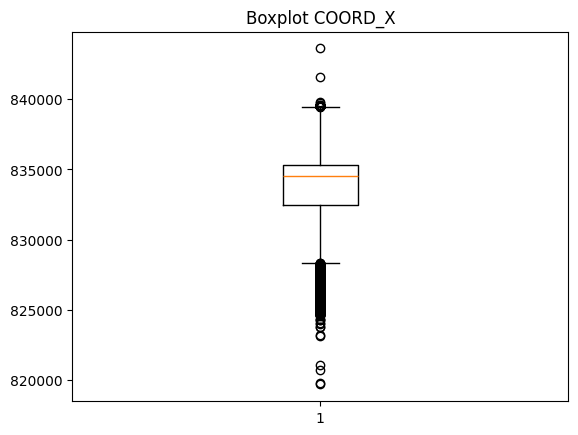

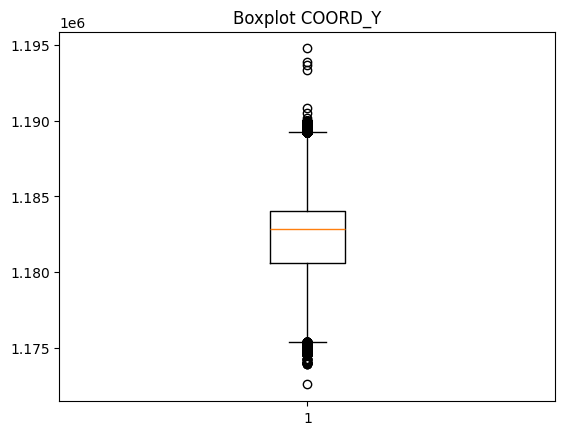

In [39]:
plt.boxplot(df["COORD_X"])
plt.title("Boxplot COORD_X")
plt.show()

plt.boxplot(df["COORD_Y"])
plt.title("Boxplot COORD_Y")
plt.show()


Se revisan las coordenadas en el eje X y el eje Y. No se ven errores graves puestoy que los valores atípicos siguen cerca de la mayoría de datos.

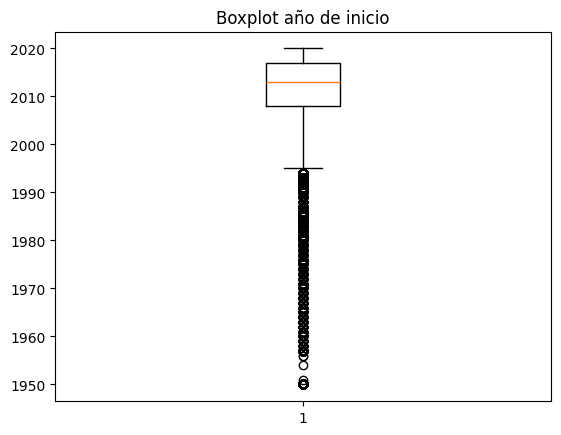

In [36]:
df["ANIO_INICIO"] = df["FECHA_INICIO_ACT"].dt.year
plt.boxplot(df["ANIO_INICIO"])
plt.title("Boxplot año de inicio")
plt.show()


Del siglo pasado casi no hay datos del año de inicio, esos pocos establecimientos con años de inicio anteriores a 1.990 representan establecimientos antiguos válidos y no es necesario eliminarlos.

**Agregación de datos**: Número de establecimientos por comuna y grupo de actividad.
Antigüedad promedio por comuna y grupo de actividad.

In [38]:
# Año de inicio como referencia temporal
df["ANIO_INICIO"] = df["FECHA_INICIO_ACT"].dt.year

anio_ref = 2025  # o: pd.Timestamp.now().year

# 1. Agrupación por COMUNA y GRUPO_ACTIVIDAD
agg_comuna_grupo = (
    df
    .groupby(["COMUNA", "GRUPO_ACTIVIDAD"], as_index=False, observed=True)
    .agg(
        num_establecimientos=("OBJECTID", "count"),
        anio_promedio=("ANIO_INICIO", "mean")
    )
)

# 2. Cálculo de antigüedad promedio a partir del año promedio
agg_comuna_grupo["antiguedad_promedio"] = anio_ref - agg_comuna_grupo["anio_promedio"]

agg_comuna_grupo.head()


,COMUNA,GRUPO_ACTIVIDAD,num_establecimientos,anio_promedio,antiguedad_promedio
0,ALTAVISTA,Comercio,1,2010.000,15.000
1,ALTAVISTA,Industria,8,2014.625,10.375
2,ALTAVISTA,Servicios,6,2009.500,15.500
3,ARANJUEZ,Comercio,7,2014.000,11.000
4,ARANJUEZ,Financiero,1,2005.000,20.000
